## Setup

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from matplotlib import pyplot

## Import Data

In [3]:
df = pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv", skiprows=0, header=0, na_values= "", dtype=str)

## Balance Data

In [4]:
#shuffle dataframe
df = df.sample(frac=1)

#get 25,000 random samples from each class
disease = df.loc[df['HeartDiseaseorAttack'] == '1.0'][:25000]
no_disease = df.loc[df['HeartDiseaseorAttack'] == '0.0'][:25000]

#concatenate the two classes
balanced_data = pd.concat([disease, no_disease])

#shuffle new balanced dataframe
balanced_data = balanced_data.sample(frac=1)

balanced_data.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
210985,1.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,12.0,5.0,8.0
17080,0.0,1.0,1.0,1.0,34.0,0.0,0.0,2.0,0.0,1.0,...,1.0,0.0,5.0,3.0,5.0,1.0,0.0,11.0,3.0,2.0
72454,0.0,0.0,0.0,1.0,35.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,7.0,2.0,0.0,1.0,6.0,6.0,8.0
70383,1.0,1.0,1.0,1.0,26.0,1.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,15.0,1.0,1.0,11.0,4.0,8.0
183409,1.0,0.0,1.0,1.0,26.0,1.0,0.0,2.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,13.0,4.0,5.0


In [37]:
feature_cols = ["HighBP","HighChol","CholCheck","BMI","Smoker","Stroke","Diabetes","PhysActivity","Fruits","Veggies","HvyAlcoholConsump","AnyHealthcare","NoDocbcCost","GenHlth","MentHlth","PhysHlth","DiffWalk","Sex","Age","Education","Income"]

#change to balanced or unbalanced dataframe
X = balanced_data[feature_cols]
y = balanced_data.HeartDiseaseorAttack

## Train Test Split

In [38]:
#enter test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1) 

## Create Decision Tree

In [39]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

## Print Model Accuracy

In [8]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Kappa statistic: ", metrics.cohen_kappa_score(y_test, y_pred))

Accuracy: 0.6758931006272157
Kappa statistic:  0.35109280777000873


In [31]:
models = []
data_types = {"Balanced": balanced_data, "Unbalanced": df}
test_split_sizes = [0.1, 0.3, 0.5]
feature_cols = ["HighBP","HighChol","CholCheck","BMI","Smoker","Stroke","Diabetes","PhysActivity","Fruits","Veggies","HvyAlcoholConsump","AnyHealthcare","NoDocbcCost","GenHlth","MentHlth","PhysHlth","DiffWalk","Sex","Age","Education","Income"]


In [33]:
from sklearn.metrics import confusion_matrix

In [35]:
for balanced_type in data_types:
    X = data_types[balanced_type][feature_cols]
    Y = data_types[balanced_type].HeartDiseaseorAttack
    for split_size in test_split_sizes:
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=split_size, random_state=1) 
        model = DecisionTreeClassifier()
        model = model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        print(balanced_type + " " + str(split_size) + ": %.3f" % metrics.cohen_kappa_score(y_test, y_pred))
        # find fnr
        _, _, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        print(fn / (fn + tp))

Balanced 0.1: 0.362
0.3292372881355932
Balanced 0.3: 0.350
0.33389473684210524
Balanced 0.5: 0.345
0.34306508281746695
Unbalanced 0.1: 0.180
0.7231514084507042
Unbalanced 0.3: 0.180
0.7196552211389007
Unbalanced 0.5: 0.179
0.7181894383906119


## Optional: Try and display decision tree

In [173]:
#from six import StringIO
#from sklearn.tree import export_graphviz
#from six import StringIO
#from IPython.display import Image 
#import pydot 
#import pydotplus

In [174]:
#dot_data = StringIO()
#export_graphviz(clf, out_file=dot_data,  
#                filled=True, rounded=True,
#                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png('heart_disease.png')
#Image(graph.create_png())

In [46]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

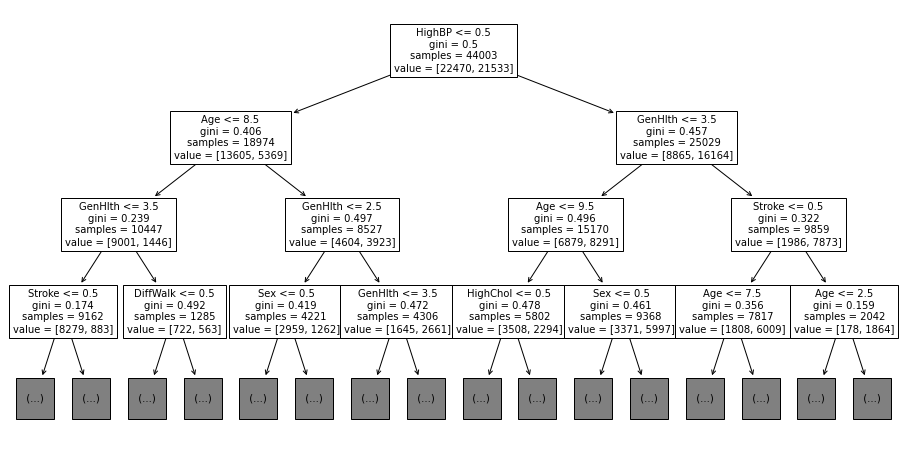

In [49]:
plt.figure(figsize=(16,8))
plot_tree(clf, max_depth=3, feature_names=feature_cols, fontsize=10);

# Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

In [13]:
models = []
data_types = {"Balanced": balanced_data, "Unbalanced": df}
test_split_sizes = [0.1, 0.3, 0.5]
feature_cols = ["HighBP","HighChol","CholCheck","BMI","Smoker","Stroke","Diabetes","PhysActivity","Fruits","Veggies","HvyAlcoholConsump","AnyHealthcare","NoDocbcCost","GenHlth","MentHlth","PhysHlth","DiffWalk","Sex","Age","Education","Income"]


In [27]:
for balanced_type in data_types:
    X = data_types[balanced_type][feature_cols]
    Y = data_types[balanced_type].HeartDiseaseorAttack
    for split_size in test_split_sizes:
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=split_size, random_state=1) 
        model = LogisticRegression(max_iter=600)
        model = model.fit(X_train,y_train)
        y_pred = model.predict_proba(X_test)
        print(balanced_type + " " + str(split_size) + ": %.3f" % roc_auc_score(y_test, y_pred[:, 1]))
        # fpr, tpr, _ = roc_curve(y_test, y_pred[:, 1], pos_label='1.0')
        # pyplot.plot(fpr, tpr, label=balanced_type + " " + str(split_size))
        # pyplot.legend()
        # pyplot.show()

Balanced 0.1: 0.854
Balanced 0.3: 0.847
Balanced 0.5: 0.846
Unbalanced 0.1: 0.847
Unbalanced 0.3: 0.848
Unbalanced 0.5: 0.847


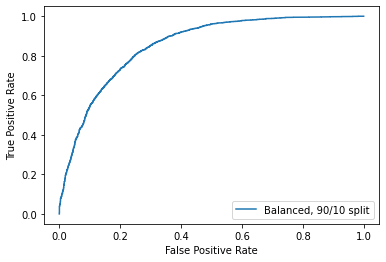

In [30]:
X = balanced_data[feature_cols]
Y = balanced_data.HeartDiseaseorAttack
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=1) 
model = LogisticRegression(max_iter=600)
model = model.fit(X_train,y_train)
y_pred = model.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred[:, 1], pos_label='1.0')
pyplot.plot(fpr, tpr, label="Balanced, 90/10 split")
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()